# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

## Откройте файл с данными и изучите общую информацию

### Открытие файла с данными

Загружаем данные из csv-файла в датафрейм c помощью библиотеки pandas. Указываем в качестве разделителя знак табуляции \t, и сохраняем результат в датафрейме data.

In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd 
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t', decimal='.')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t', decimal='.')

### Изучение общей информации о полученном датафрейме

Выведем первые 20 строчек датафрейма data на экран.

In [3]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Выведем основную информацию о датафрейме с помощью метода info().

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Построение гистограммы для всех числовых столбцов таблицы на одном графике

Построим гистограмму для всех числовых столбцов таблицы на одном графике.

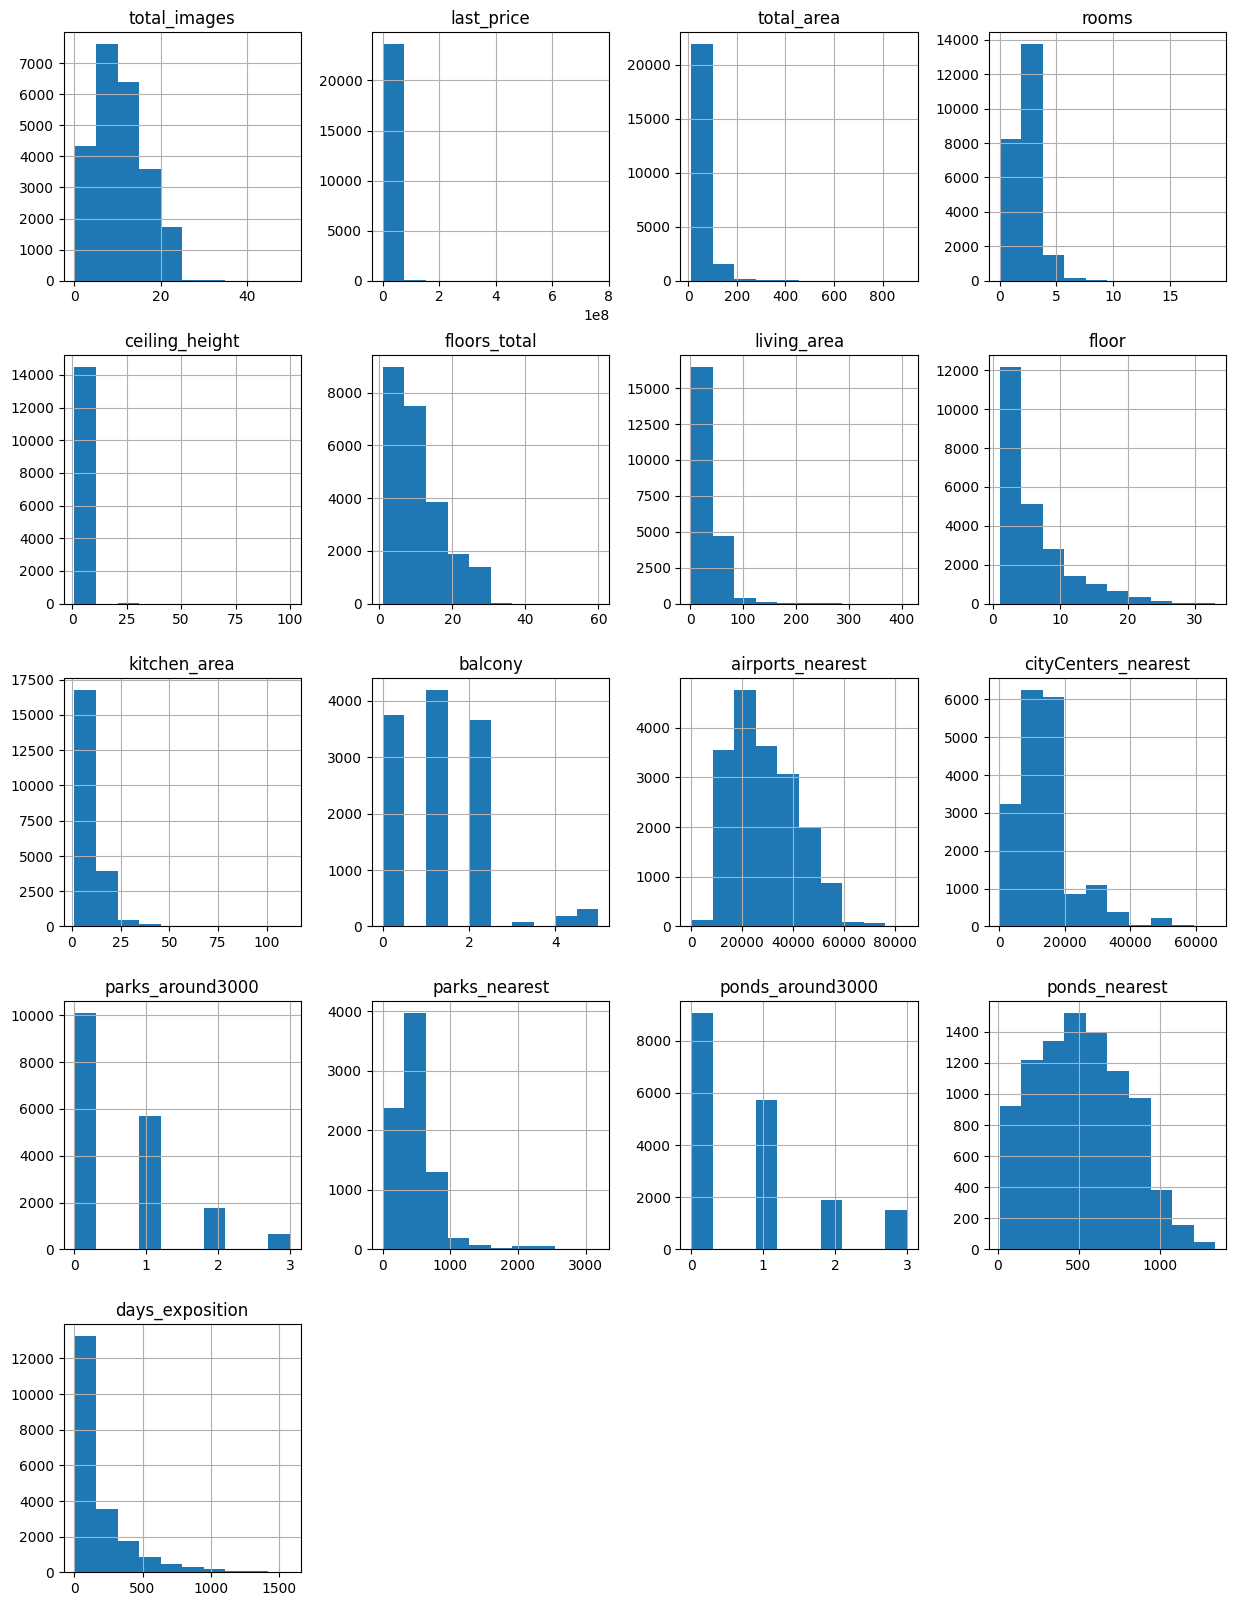

In [5]:
data.hist(figsize=(15, 20));

<div style="border:solid green 2px; padding: 20px">
Вывод: на первом этапе был открыт файл с данными, были выведены первые 20 строк и построены гистограммы ддля всех числовых столбцов. Вполне понятно, что делать какие-либо первоначальные выводы на основании данной информации невозможно, а данные необходимо подвергнуть предобработке.

## Выполнение предобработки данных

### Обработка пропусков

Необходим определить какое количество пропусков в каждом столбце датафрейма.

Выведем количество пропущенных значений для каждого столбца. Используем комбинацию двух методов.

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

#### Удаление пропусков в `ceiling_height`

Столбцов с пропущенными значениями достаточно много. Первый из них `ceiling_height` (высота потолка). Можно было бы взять медиану ряда для всех квартир, но пока не ясно, какой показатель имеет данное значение для всей выборки. Применим к таблице data метод describe() и выведите на экран список характерных значений для столбца `ceiling_height`.

In [7]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In [8]:
print(data['ceiling_height'].describe())

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


Понятно, что квартира не может иметь высоту ни 100 м, ни 1 м. Среднее и медиана вполне отражают высоту квартир. Согласно пункту 5.8 СНиП 31-01-2003 "Здания жилые многоквартирные" высота (от пола до потолка) жилых помещений и кухни (кухни-столовой) в климатических районах IА, IБ, IГ, IД и IVA должна быть не менее 2,7 м, а в других климатических районах - не менее 2,5 м. Согласно строительной климатологии климатический район Санкт - Петербурга IIВ. Ленинградская область относится к III (II) климатическому региону. Квартиры с меньшей высотой потолков нарушают требования СНиП. 

Итак, нужно разобраться с аномалиями в выборке. Для начала найдем квартиры с самыми большими значениями в столбце `ceiling_height`. Одной строкой кода отсортируем таблицу по убыванию значений в столбце `ceiling_height` и выведем на экран первые 20 строк всей таблицы.

In [9]:
display(data.sort_values(by = 'ceiling_height',ascending = False).head(20))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22869,0,15000000.0,25.0,2018-07-25T00:00:00,1,100.0,5.0,14.0,5,True,...,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0
22336,19,9999000.0,92.4,2019-04-05T00:00:00,2,32.0,6.0,55.5,5,False,...,16.5,4.0,Санкт-Петербург,18838.0,3506.0,0.0,NaN,3.0,511.0,NaN
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.0,3.0,53.0,2,NaN,...,8.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21377,19,4900000.0,42.0,2017-04-18T00:00:00,1,27.5,24.0,37.7,19,False,...,11.0,2.0,Санкт-Петербург,42742.0,9760.0,0.0,NaN,0.0,NaN,61.0
20478,11,8000000.0,45.0,2017-07-18T00:00:00,1,27.0,4.0,22.0,2,NaN,...,10.0,1.0,Санкт-Петербург,18975.0,3246.0,0.0,NaN,3.0,449.0,429.0
5246,0,2500000.0,54.0,2017-10-13T00:00:00,2,27.0,5.0,30.0,3,NaN,...,9.0,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
5807,17,8150000.0,80.0,2019-01-09T00:00:00,2,27.0,36.0,41.0,13,NaN,...,12.0,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
10773,8,3800000.0,58.0,2017-10-13T00:00:00,2,27.0,10.0,30.1,3,False,...,8.1,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,71.0
17857,1,3900000.0,56.0,2017-12-22T00:00:00,3,27.0,5.0,33.0,4,False,...,NaN,NaN,Санкт-Петербург,41030.0,15543.0,0.0,NaN,0.0,NaN,73.0
22938,14,4000000.0,98.0,2018-03-15T00:00:00,4,27.0,2.0,73.0,2,True,...,9.0,1.0,деревня Нижняя,NaN,NaN,NaN,NaN,NaN,NaN,27.0


Сложилось предположение, что при абсолютно явной ошибке в значении 100 м для первой строки, начиная со второй строки для значений с 32 м забыли поставить запятую и значения внесены в дециметрах. 

Построим гистограмму распределения значений в столбце `ceiling_height`.

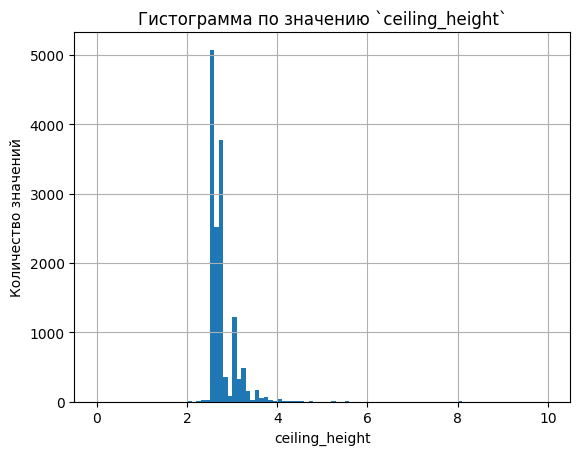

In [10]:
data['ceiling_height'].hist(bins=100,range=(0,10))
plt.ylabel('Количество значений')
plt.title('Гистограмма по значению `ceiling_height`')
plt.xlabel('ceiling_height');

Понятно, что большинство значений расположены между 2 и 4 метрами. Определим разбивку по количеству значений. Введем фукнцию, определяющую количество и процент. Она понадобится во многих расчетах.

In [11]:
data['ceiling_height'].value_counts()

ceiling_height
2.50    3515
2.60    1646
2.70    1574
3.00    1112
2.80     993
        ... 
5.00       1
2.20       1
2.34       1
3.93       1
3.59       1
Name: count, Length: 183, dtype: int64

Сгруппируем данные.

In [12]:
def ceiling_category(height): #создаем функцию для категоризации данных в столбце `ceiling_height`
        if height < 2.5:
            return '<2.5'
        elif 2.5 <= height<=5.0:
            return '2.5-5'
        elif 5.0 < height<25:
            return '5-25'
        elif 25<=height<=50:
            return '25-50'
        elif 50<height:
            return '>50'
        else:
            return 'Нет категории'
        
        
data['ceiling_category'] = data['ceiling_height'].apply(ceiling_category)
data['ceiling_category'].value_counts() #подсчитываем значения по категориям


ceiling_category
2.5-5            14395
Нет категории     9195
<2.5                73
25-50               19
5-25                16
>50                  1
Name: count, dtype: int64

В категорию `Нет категории`, судя по всему, попали как раз все пропущенные значения. Проверим это.

In [13]:
no_category_ceiling = data.query('ceiling_category=="Нет категории"') #отсортировываем таблицу по значению `Нет категории`
print(no_category_ceiling['ceiling_height'].unique())

[nan]


В категории `25-50` присутствуют именно значения высоты потолка в дециметрах. Заменим значения в данной группе на значения в метрах (разделим на 10). Группы менее 2,5 м, 5-25 м, и более 50 метров отбросим. Это явные ошибки.

In [14]:
data = data.query('ceiling_category!="<2.5"')
data = data.query('ceiling_category!="5-25"')
data = data.query('ceiling_category!=">50"')

Необходимо перевести тип данных `ceiling_height` в `float`, т.к. иначе расчет будет неверным.

In [15]:
data['ceiling_height'] = data['ceiling_height'].astype('float') #переводим значения столбца `ceiling height` в тип float

In [16]:
data.loc[data['ceiling_height']>=25.0, 'ceiling_height'] = data['ceiling_height']/10 #производим деление по условию

Применим к таблице data метод describe() и выведите на экран список характерных значений для столбца `ceiling_height`.

In [17]:
print(data['ceiling_height'].describe())

count    14414.000000
mean         2.727190
std          0.270902
min          2.500000
25%          2.520000
50%          2.650000
75%          2.800000
max          5.000000
Name: ceiling_height, dtype: float64


Вставим в пропущенные ячейки в столбце `ceiling_height` медианное значение по столбцу `ceiling height`

In [18]:
data.loc[data['ceiling_category']=='Нет категории', 'ceiling_height'] = data['ceiling_height'].median()

#### Удаление пропусков в `living_area`

В столбце `living_area` отражена жилая площадь квартиры. Проверим зависимости от общей площади квартиры `total area`

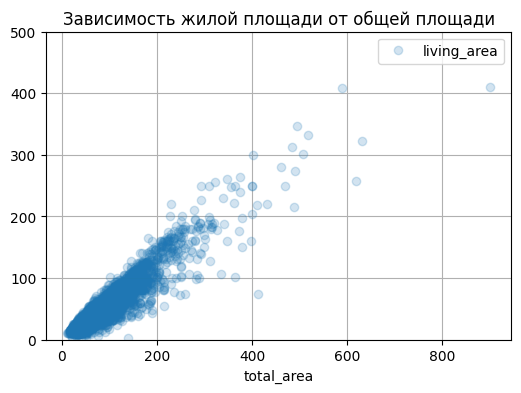

In [19]:
#построение графика зависимости
data.plot(x='total_area', y='living_area', style='o', ylim = (0,500),grid = True, figsize=(6, 4), alpha = 0.2)
plt.title('Зависимость жилой площади от общей площади');

Коэффициент Пирсона также показывает близость этих значений.

In [20]:
print(data['total_area'].corr(data['living_area']))

0.9393467447826448


Видно, что зависимость практически линейная, т.к. близка к 1. Чем больше квартира, тем больше жилая площадь.

Для выявления коэффициента зависимости необходимо проверить данные столбца `total area`

In [21]:
data['total_area'].describe()

count    23609.000000
mean        60.347139
std         35.556255
min         12.000000
25%         40.000000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

Квартира в 900 кв.м это хорошо. Но посмотрим квартиры по площади.

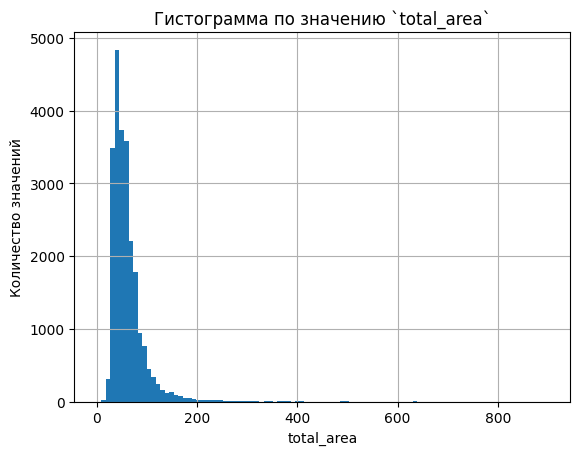

In [22]:
data['total_area'].hist(bins=100,range=(0,900))
plt.ylabel('Количество значений')
plt.title('Гистограмма по значению `total_area`')
plt.xlabel('total_area');

Отортируем значения по категориям.

In [23]:
def total_area_category(area):  #создаем функцию для категоризации
        if area < 25:
            return '<25'
        elif 25.0 <= area<=40.0:
            return '25-40'
        elif 40.0 < area<60.0:
            return '40-60'
        elif 60.0<=area<=100.0:
            return '60-100'
        elif 100.0<=area<=250.0:
            return '100-250'
        elif 250<area:
            return '<250'
        else:
            return 'Нет категории'
        
        
data['total_area_category'] = data['total_area'].apply(total_area_category) #передаем данные в столбец
data['total_area_category'].value_counts() #считаем количество данных по категориям


total_area_category
40-60      8717
60-100     7046
25-40      5826
100-250    1722
<25         189
<250        109
Name: count, dtype: int64

Квартир 250 кв.м и выше мало и их показатели нерепрезентативны. Тем более, что они явно относятся к другом классу жилья, который нельзя объединять с основной группой.

In [24]:
data = data.query('total_area_category!="<250"') #убираем значения более 250 кв.м

Выведем столбец соотношения общей и жилой площади квартир.

In [25]:
data['total_living'] = data['total_area']/data['living_area']

C:\Users\Татьяна\AppData\Local\Temp\ipykernel_12160\824489988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['total_living'] = data['total_area']/data['living_area']


Найдем медианное значение для столбца `total_living`

In [26]:
median_total_living = data['total_living'].median()
print(median_total_living)

1.7621621621621621


Теперь заменим пропущенные значения в столбце living_area на соотношение total_area и медианного значения.

In [27]:
data.loc[(data['living_area'].isna()), 'living_area'] = data['total_area']/median_total_living

#### Удаление пропусков в `floors_total`

Информация об общей этажности дома `floors_total` заполнить невозможно без знания полного адреса. Эти предложения было принято решение удалить.

In [28]:
#выведем количество пустых строк в столбце `floors_total`
print("{:.1%}".format(data['floors_total'].isna().sum()/data.shape[0])) 

0.4%


In [29]:
data = data.dropna(subset = ['floors_total'])

#### Удаление пропусков в `is_apartment`

Рассчитаем количество апартаментов в общей выборке.

In [30]:
data['is_apartment'].mean()

0.017072284780239737

1,7% - это незначительное значение. По логике при заполнении объявления, если можно ответить на вопрос наличия той или иной характеристики "нет", а обязательного заполнения графа не требует, то появляется пропуск. Соответственно, вероятнее всего, при наличии пропуска помещение не является апартаментами.

Заменим пропуски значением `False`

In [31]:
data['is_apartment'] = data['is_apartment'].fillna(False)

C:\Users\Татьяна\AppData\Local\Temp\ipykernel_12160\2052809825.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['is_apartment'] = data['is_apartment'].fillna(False)


#### Удаление пропусков в `kitchen_area`

Рассчитаем коэффициент Пирсона.

In [32]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_category,total_area_category,total_living
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,False,...,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,2.5-5,100-250,2.117647
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.600000,1,False,...,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Нет категории,40-60,2.172043
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.300000,4,False,...,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Нет категории,40-60,1.632653
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,90.230061,9,False,...,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Нет категории,100-250,NaN
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,False,...,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,2.5-5,60-100,3.125000


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23415 entries, 0 to 23698
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23415 non-null  int64  
 1   last_price            23415 non-null  float64
 2   total_area            23415 non-null  float64
 3   first_day_exposition  23415 non-null  object 
 4   rooms                 23415 non-null  int64  
 5   ceiling_height        23415 non-null  float64
 6   floors_total          23415 non-null  float64
 7   living_area           23415 non-null  float64
 8   floor                 23415 non-null  int64  
 9   is_apartment          23415 non-null  bool   
 10  studio                23415 non-null  bool   
 11  open_plan             23415 non-null  bool   
 12  kitchen_area          21212 non-null  float64
 13  balcony               12032 non-null  float64
 14  locality_name         23367 non-null  object 
 15  airports_nearest      17

In [34]:
print(data.drop(['first_day_exposition',
                'locality_name',
                'ceiling_category',
                'total_area_category'],
                axis=1).
                corr().sort_values(by='kitchen_area', ascending=False)['kitchen_area'].head())

kitchen_area      1.000000
total_area        0.579156
last_price        0.527964
living_area       0.361459
ceiling_height    0.329341
Name: kitchen_area, dtype: float64


Неизвестен тип кухонного оборудования (при газовом оборудовании на кухне объединять ее с жилыми помещениями нельзя). Поэтому единственный вариант предположить, что все-таки зависимость от общей площади есть. Иначе значения придется удалять.

Выведем столбец соотношения общей площади и площади кухни.

In [35]:
data['total_kitchen'] = data['total_area']/data['kitchen_area']

Рассчитаем медианное значение по столбцу total_kichen

In [36]:
median_total_kitchen = data['total_kitchen'].median()
print(median_total_kitchen)

5.793103448275862


In [37]:
data.loc[(data['kitchen_area'].isna()), 'kitchen_area'] = data['total_area']/median_total_kitchen

#### Удаление пропусков в `balcony`

Здесь логика аналогична ситуации с апартаментами. Наличие балкона/лоджии серьезно влияет на стоимость. Если не указали, что он есть, значит его нет.

In [38]:
data['balcony'] = data['balcony'].fillna(0) #придаем пропущенной ячейке значение 0

#### Удаление пропусков в `locality_name`

Наличие информации о населенном пункте является основополагающей. Разница стоимости в областном центре или в данном случае отдельном субъекте РФ может в два раза отличаться от стоимости в остальных населенных пунктах области. Данные строки придется удалить.

In [39]:
#выведем количество пустых строк в столбце `locality_name`
print("{:.1%}".format(data['locality_name'].isna().sum()/data.shape[0])) 

0.2%


In [40]:
data = data.dropna(subset = ['locality_name'])

#### Удаление пропусков в `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`, `days_exposition` 

Выявить зависимость в данном случае крайне сложно. Оставим пропуски, но надо будет учитывать это при расчете зависимости. Ноль поставить нельзя, это числовое значение и рассмотрено в дальнейшем будет, как объект, расположенный в аэропорту, городском центре, парке и пруду за одно. В отношении `days_exposition` также есть пропуски. Здесь нельзя вставить медиану ряда, т.к. места продаж слишком разные по инвестиционной привлекательности. Это явно технический баг. Или квартиры еще не проданы.

In [41]:
#выведем количество пустых строк в столбце `cityCenters_nearest`
print("{:.1%}".format(data['cityCenters_nearest'].isna().sum()/data.shape[0])) 

23.4%


Не будем удалять пустые данные из столбца `cityCenters_nearest`

### Удаление дубликатов в названиях `locality_name`

Проверим список уникальных значений в столбце `locality_name`, но сначала изменим регистр, чтобы хотя бы этот параметр не добавлял новых значений в выборку.

In [42]:
data['locality_name'] = data['locality_name'].str.lower()

Проверим уникальные значения столбца `locality_name`

In [43]:
data['locality_name'].sort_values().unique()

array(['бокситогорск', 'волосово', 'волхов', 'всеволожск', 'выборг',
       'высоцк', 'гатчина', 'городской поселок большая ижора',
       'городской поселок янино-1', 'городской посёлок будогощь',
       'городской посёлок виллози', 'городской посёлок лесогорский',
       'городской посёлок мга', 'городской посёлок назия',
       'городской посёлок новоселье', 'городской посёлок павлово',
       'городской посёлок рощино', 'городской посёлок советский',
       'городской посёлок фёдоровское', 'городской посёлок янино-1',
       'деревня агалатово', 'деревня аро', 'деревня батово',
       'деревня бегуницы', 'деревня белогорка', 'деревня большая вруда',
       'деревня большая пустомержа', 'деревня большие колпаны',
       'деревня большое рейзино', 'деревня большой сабск', 'деревня бор',
       'деревня борисова грива', 'деревня ваганово', 'деревня вартемяги',
       'деревня вахнова кара', 'деревня выскатка', 'деревня гарболово',
       'деревня глинка', 'деревня горбунки', 'деревня 

In [44]:
len(pd.unique(data['locality_name'])) #рассчитаем количество уникальных значений в столбце `locality_name`

363

In [45]:
# удаляем типы населенных пунктов, они все равно не понадобятся
data['locality_name'] = (
    data['locality_name']
    .replace(['городской посёлок ', 'поселок ', 'посёлок ', 'деревня ', 'село ', \
              'городского типа ','садовое товарищество ', 'городской ','садоводческое некоммерческое товарищество ',\
              'при железнодорожной станции ', 'коттеджный ', 'станции '], '', regex=True)
)

#меняем ё на е
data['locality_name'] = (
    data['locality_name']
    .replace(['ё'], 'е', regex=True)
) 


In [46]:
# проверяем результат замены
data['locality_name'].sort_values().unique()

array(['агалатово', 'александровская', 'алексеевка', 'аннино', 'аро',
       'барышево', 'батово', 'бегуницы', 'белогорка', 'белоостров',
       'бокситогорск', 'большая вруда', 'большая ижора',
       'большая пустомержа', 'большие колпаны', 'большое рейзино',
       'большой сабск', 'бор', 'борисова грива', 'бугры', 'будогощь',
       'ваганово', 'важины', 'вартемяги', 'вахнова кара', 'вещево',
       'виллози', 'вознесенье', 'возрождение', 'войсковицы', 'войскорово',
       'володарское', 'волосово', 'волхов', 'всеволожск', 'выборг',
       'вырица', 'выскатка', 'высокоключевой', 'высоцк', 'гаврилово',
       'гарболово', 'гатчина', 'гладкое', 'глажево', 'глебычево',
       'глинка', 'гончарово', 'горбунки', 'гостилицы', 'громово',
       'дзержинского', 'дружная горка', 'дружноселье', 'дубровка',
       'елизаветино', 'ефимовский', 'жилгородок', 'жилпоселок', 'житково',
       'заводской', 'заклинье', 'заневка', 'запорожское', 'зеленогорск',
       'зимитицы', 'ивангород', 'извара'

In [47]:
len(pd.unique(data['locality_name'])) #рассчитаем количество уникальных значений в столбце `locality_name` после преобразования

304

Выведем данные о количестве дубликатов в данных

In [48]:
data.duplicated().sum()

0

In [49]:
#переименуем столбец 'cityCenters_nearest', чтобы все буквы были одного регистра
data = data.rename(columns={'cityCenters_nearest': 'citycenters_nearest'}) 

<div style="border:solid green 2px; padding: 20px">
Вывод: на втором этапе были проанализированы пропуски в данных и дубликаты:
    
- В отношении `ceiling_height` были отброшены данные, явно являющиеся ошибками. В отношении пропусков была внесена медиана по оставшимся значениям. При этом для корректного вывода тип значений был изменен на `float`
- В отношении `living_area` была выведена зависимость от общей площади `total_area`, в отношении которой пропусков нет. Медиана ряда была использована в качестве делителя при расчете жилой площади `living_area`.
- Пропуски в значениях столбца `is_apartment` были заполнены False. Это немаловажный фактор при принятии решения о покупке ввиду разного налогообложения в отношении жилых помещений и нежилых, какими и являются апартаменты. Скрывать данный факт, по сути, бесполезно. Обычно об этом пишут непосредственно в объявлении. Предполагаем, что при формировании начального вида датасета данные текста объявления (комментариев) были учтены. И если не была предоставлена информация о том, что помещение является апартаментами, то, соответственно, предполагаем, что помещение является квартирой.
- Данные с пропусками в столбце `floors_total` были удалены. Причиной стало то, что количество этажей в доме в первую очередь характеризует тип дома и его конструктив, который серьезным образом влияет на стоимость. В высотных домах за счет большей площади есть возможность дополнительной проектировки дополнительных помещений (кладовок, машиномест и пр.), что дополнительно влияет на стоимость помещения. Соответственно, мы не знаем конструктив общего дома, а отсутствие данных приведет в погрешности в расчетах.
- Пропущенные данные в столбце `kitchen_area`, не смотря на относительно низкий размер корреляции, был рассчитан в зависимости от общей площади квартиры. Основные факторы, влияющие на площадь квартиры, - это архитектурное решение (тут у нас данных нет даже о классе общего дома), общая площадь, от которой и была рассчитана зависимость, и количество комнат (здесь зависимость не выявлена). Но наличие и площадь кухни достаточно важный элемент.
- В столбце `balcony` пропуски были заполнены 0, т.к. данный элемент является важным. Он серьезно влияет на стомость, т.к. большинство покупателей считают данную площадь дополнительным помещений для хозяйственных нужд. Если бы балкон в помещении был, о нем бы обязательно сообщили.
- В столбцах `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`, `days_exposition` пропуски были оставлены, чтобы не нарушать дальнейшие расчеты. 0 ставить нельзя, т.к. это будет говорить о непосредственной близости анализируемых помещений к аэропорту, парку, пруду. в отношении `days_exposition` пропуски были пока оставлены. Нельзя в данному случае воспользоваться медианой ряда, даже если разбить значения по населенным пунктам, т.к. на количество дней экспозиции все остальные параметры и тут заполнение данного возможно очень осторожно в конце работы. Изменили регистр символов в наименовании столбца `cityCenters_nearest` для дальнейшего использования.
- Из столбца `locality_name` пропуски были удалены ввиду серьезных расхождений в продаже объектов в том или ином населенном пункте. И тем более нельзя сравнивать их с предложениями субъекта РФ Санкт-Петербурга ввиду различной инвестиционной привлекательности.
- В конце проекта были проверены дубликаты в названиях `locality_name`. Тип населенного пункта был удален из названий. И так понятно, что основным место притяжения покупателей будет именно Санкт-Петербург.
- Основными причинами ошибок могут стать и человеческий фактор, и технический фактор. Для снижения количества пропусков необходимо ввести правило, что пока все данные не будут заполнены, объявление не отправляется на публикацию.
    
    
    

## Добавим в таблицу новые столбцы

Добавим в таблицу новые столбцы со следующими параметрами:
- цена одного квадратного метра (нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой);
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «‎первый», «последний», «другой»);
- расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений).

In [50]:
#создадим столбец с данными о цене за один квадратный метр и округлим значения в нем до 2 знаков после запятой
data['price_1_metr'] = round(data['last_price']/data['total_area'],2) 

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23367 entries, 0 to 23698
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23367 non-null  int64  
 1   last_price            23367 non-null  float64
 2   total_area            23367 non-null  float64
 3   first_day_exposition  23367 non-null  object 
 4   rooms                 23367 non-null  int64  
 5   ceiling_height        23367 non-null  float64
 6   floors_total          23367 non-null  float64
 7   living_area           23367 non-null  float64
 8   floor                 23367 non-null  int64  
 9   is_apartment          23367 non-null  bool   
 10  studio                23367 non-null  bool   
 11  open_plan             23367 non-null  bool   
 12  kitchen_area          23367 non-null  float64
 13  balcony               23367 non-null  float64
 14  locality_name         23367 non-null  object 
 15  airports_nearest      17

In [52]:
#выведем данные с днем недели публикации объявления

#измененим формат данных с толбце `first_day_exposition`
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])

#создадим новый столбец `weekday`
data['weekday_of_date'] = data['first_day_exposition'].dt.weekday

In [53]:
#выведем данные о месяце публикации
data['month_of_date'] = data['first_day_exposition'].dt.month

In [54]:
#выведем данные о годе публикации
data['year_of_date'] = data['first_day_exposition'].dt.year

In [55]:
#выведем тип этажа квартиры (значения — «первый», «последний», «другой»)

#заменим тип столбца `floors_total` на int для дальнейшего сравнения
data['floors_total'] = data['floors_total'].astype('int') #переводим значения столбца `floors_total` в тип int

#создадим функцию категоризации
def floor_category(row):
    try:
        if row['floor']==1:
            return 'первый'
        elif row['floor']==row['floors_total']:
            return 'последний'
        elif row['floor']!=1 & row['floor']!=row['floors_total']:
            return 'другой'
    except:
        return 'Нет категории'

#заполняем столбец `type_floor`
data['type_floor'] = data.apply(floor_category, axis = 1)

In [56]:
#изменим расстояние до центра города в километры (переведите из м в км и округлите до ближайших целых значений).
data['citycenters_nearest'] = round(data['citycenters_nearest']/1000)

<div style="border:solid green 2px; padding: 20px">
Вывод: на третьем этапе были добавлены новые столбцы в датасет:
    
- цена одного квадратного метра (нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой);
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «первый», «последний», «другой»);
- расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений).

При категоризации значений по этажам был изменен тип данных `floors_total` на `int` для корректной категоризации. Значение все равно не может быть дробным.

## Проведем исследовательский анализ данных

На данном этапе мы проанализируем зависимости стоимости 1 кв. метра от величин следующих факторов:

- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего парка

Изучим данные и отбросим нерепрезентативные значения после чего проанализируем наличие/отсутствие зависимости.

### Общая площадь

Проверим значения общей площади прии помощи оператора describe()

In [57]:
data['total_area'].describe()

count    23367.000000
mean        58.991832
std         28.906139
min         12.000000
25%         40.000000
50%         52.000000
75%         69.085000
max        250.000000
Name: total_area, dtype: float64

На первом этапе мы уже отбросили выбивающиеся значения, которые близки к нарушению законодательства, либо относятся явно к другой категории помещений.

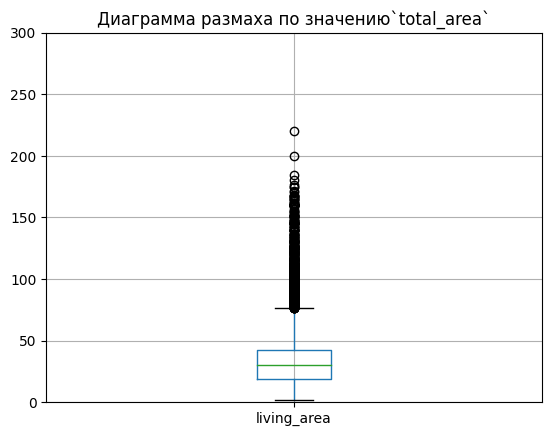

In [58]:
#построим диаграмму размаха
plt.ylim(0, 300)
data.boxplot('living_area')
plt.title('Диаграмма размаха по значению`total_area`');

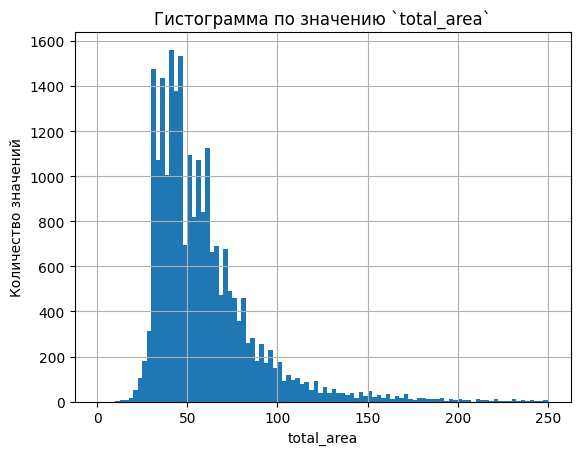

In [59]:
data['total_area'].hist(bins = 100,range=(0,250)) #построим гистограмму по значениям площади
plt.ylabel('Количество значений')
plt.title('Гистограмма по значению `total_area`')
plt.xlabel('total_area');

Всплески возникают в результате наличия разного количества комнат в выборке.

### Жилая площадь

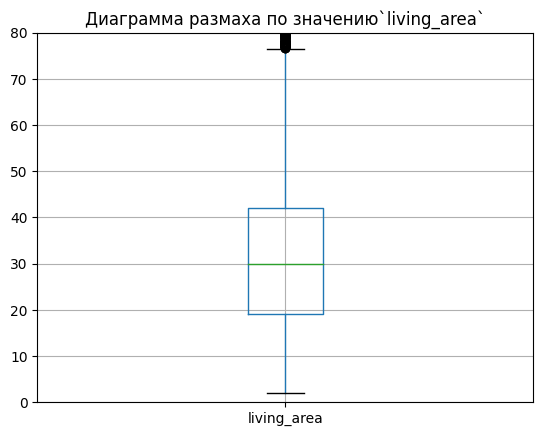

In [60]:
#построим диаграмму размаха
plt.ylim(0, 80)
data.boxplot('living_area')
plt.title('Диаграмма размаха по значению`living_area`');

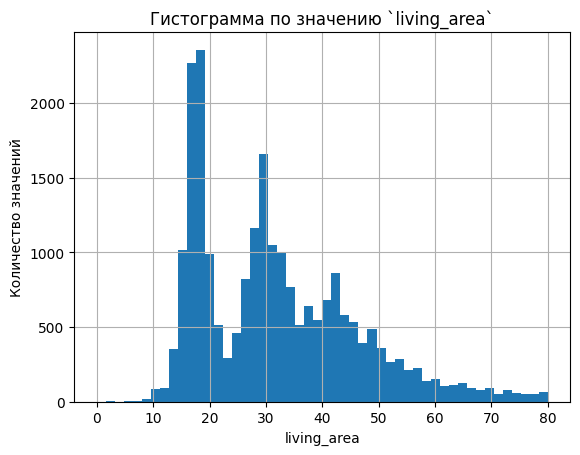

In [61]:
data['living_area'].hist(bins = 50,range=(0,80)) #построим гистограмму по значениям площади
plt.ylabel('Количество значений')
plt.title('Гистограмма по значению `living_area`')
plt.xlabel('living_area');

### Площадь кухни

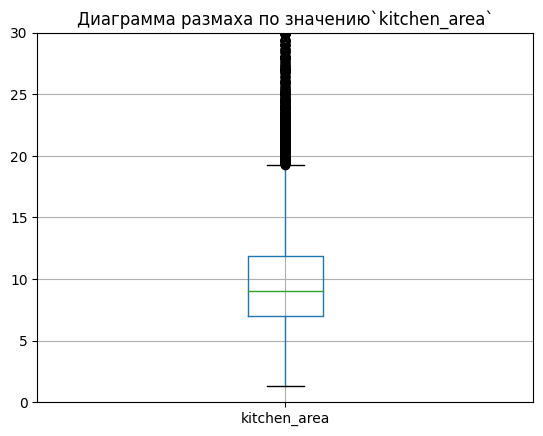

In [62]:
#построим диаграмму размаха
plt.ylim(0, 30)
data.boxplot('kitchen_area')
plt.title('Диаграмма размаха по значению`kitchen_area`');

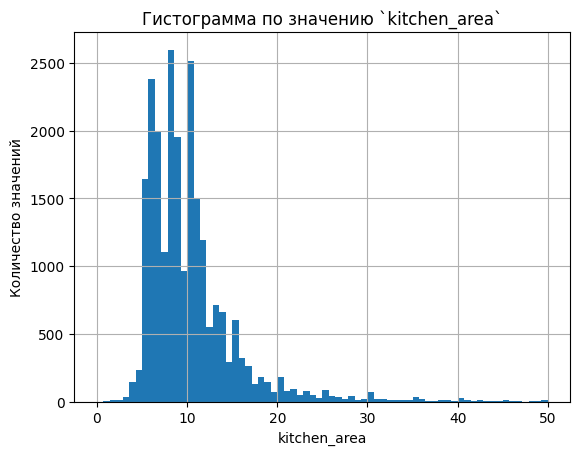

In [63]:
data['kitchen_area'].hist(bins = 70,range=(0,50)) #построим гистограмму по значениям площади
plt.ylabel('Количество значений')
plt.title('Гистограмма по значению `kitchen_area`')
plt.xlabel('kitchen_area');

### Цена объекта

In [64]:
data['last_price'].describe()

count    2.336700e+04
mean     6.192740e+06
std      7.037382e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.700000e+06
max      3.300000e+08
Name: last_price, dtype: float64

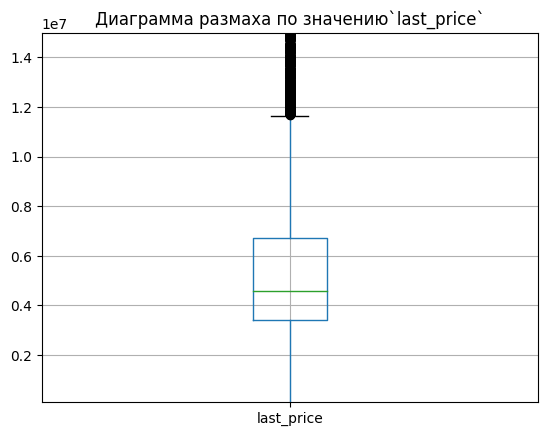

In [65]:
#построим диаграмму размаха
plt.ylim(100000, 15000000)
data.boxplot('last_price')
plt.title('Диаграмма размаха по значению`last_price`');

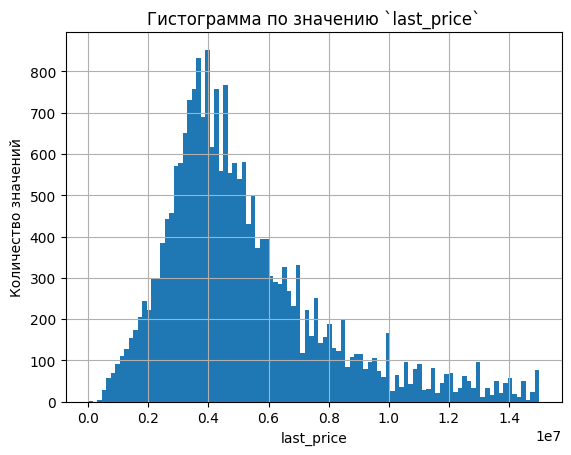

In [66]:
data['last_price'].hist(bins = 100,range=(0,15000000)) #построим гистограмму по значениям цены
plt.ylabel('Количество значений')
plt.title('Гистограмма по значению `last_price`')
plt.xlabel('last_price');

Проверим минимальную стоимость помещений.

In [67]:
data['last_price'].sort_values(ascending = False).tail()

16219    450000.0
16274    440000.0
14911    430000.0
17456    430000.0
8793      12190.0
Name: last_price, dtype: float64

In [68]:
display(data.query('last_price==12190'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,ceiling_category,total_area_category,total_living,total_kitchen,price_1_metr,weekday_of_date,month_of_date,year_of_date,type_floor
8793,7,12190.0,109.0,2019-03-20,2,2.75,25,32.0,25,False,...,8.0,2.5-5,100-250,3.40625,2.691358,111.83,2,3,2019,последний


Судя по площади, самое маленькое значение представлено в тыс. руб. Изменим значение на руб.

In [69]:
data.loc[data['last_price']==12190,'last_price']=data['last_price']*1000

### Количество комнат

Проверим уникальные значения столбца.

In [70]:
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0, 11,  7,  8,  9, 10, 14], dtype=int64)

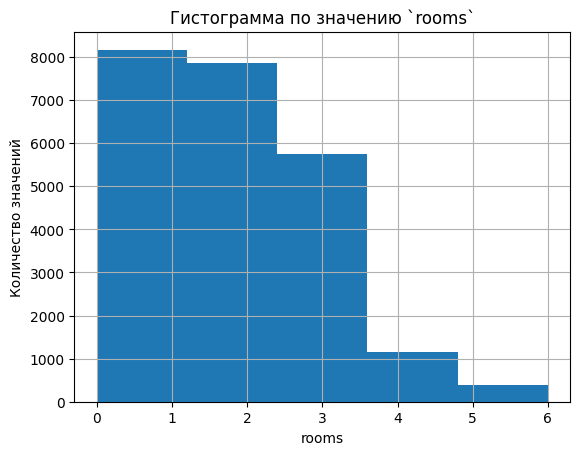

In [71]:
data['rooms'].hist(bins = 5,range=(0,6)) #построим гистограмму по значениям комнат
plt.ylabel('Количество значений')
plt.title('Гистограмма по значению `rooms`')
plt.xlabel('rooms');

### Высота потолков

Высоту потолков мы уже изучили на первом этапе при заполнении пропущенных значений.

Text(0.5, 1.0, 'Диаграмма размаха по значению`ceiling_height`')

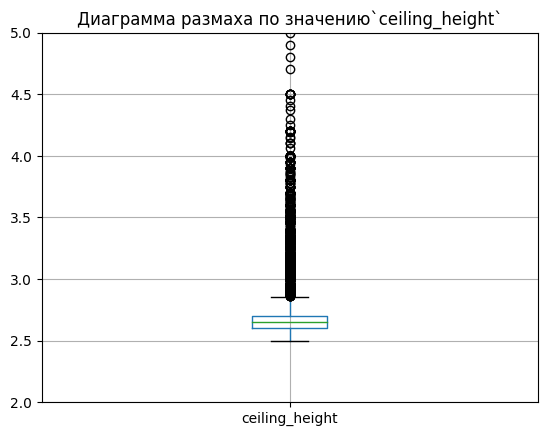

In [72]:
#построим диаграмму размаха
plt.ylim(2, 5)
data.boxplot('ceiling_height')
plt.title('Диаграмма размаха по значению`ceiling_height`')

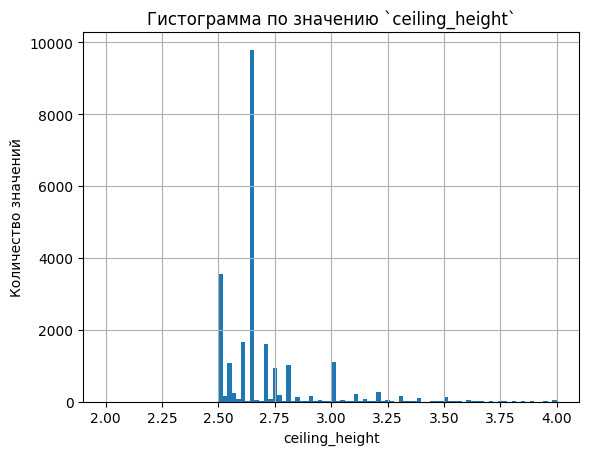

In [73]:
data['ceiling_height'].hist(bins = 100,range=(2,4)) #построим гистограмму по значениям высоты потолков
plt.ylabel('Количество значений')
plt.title('Гистограмма по значению `ceiling_height`')
plt.xlabel('ceiling_height');

### Тип этажа квартиры («первый», «последний», «другой»);

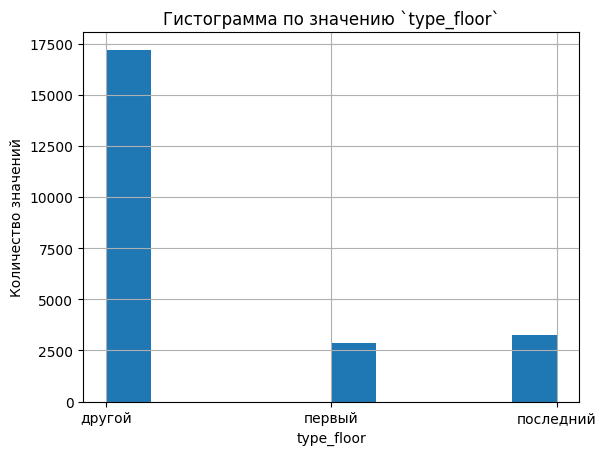

In [74]:
data['type_floor'].hist(bins = 10) #построим гистограмму по значениям категорий этажа
plt.ylabel('Количество значений')
plt.title('Гистограмма по значению `type_floor`')
plt.xlabel('type_floor');

Не будем отбрасывать значения для выявления в дальнейшем зависимости.

### Общее количество этажей в доме

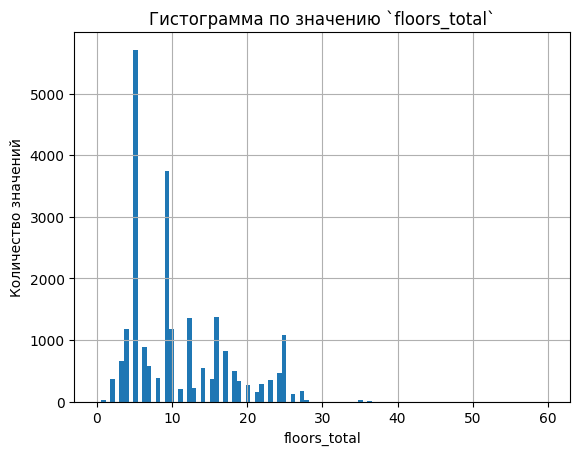

In [75]:
data['floors_total'].hist(bins = 100, range = (0,60)) #построим гистограмму по значениям количества этажей в доме
plt.ylabel('Количество значений')
plt.title('Гистограмма по значению `floors_total`')
plt.xlabel('floors_total');

In [76]:
data['floors_total'].max() #проверим значение количества этажей по объему значений

60

35 этажей — количество этажей самого высокого дома с квартирами в Санкт-Петербурге — жилого комплекса «Князь Александр Невский». Мало вероятно, что в других менее инвестиционно привлекательных районах есть здания выше.

In [77]:
#проверим города, в которых самое большое количество этажей
data_floors=data.query('floors_total>35') 
display(data_floors['locality_name'])

397      санкт-петербург
2253           кронштадт
5807     санкт-петербург
11079    санкт-петербург
16731    санкт-петербург
Name: locality_name, dtype: object

Самый высокий дом в Крондштате согласно открытым данным имеет только 15 этажей.

In [78]:
#выявим выпадающие значения
data_floors['floors_total'].unique()

array([36, 60, 52])

In [79]:
#удалим значения
data = data[(data['floors_total'] != 36) & (data['floors_total'] != 60) & (data['floors_total'] != 52)]

### Расстояние до центра города в колиметрах

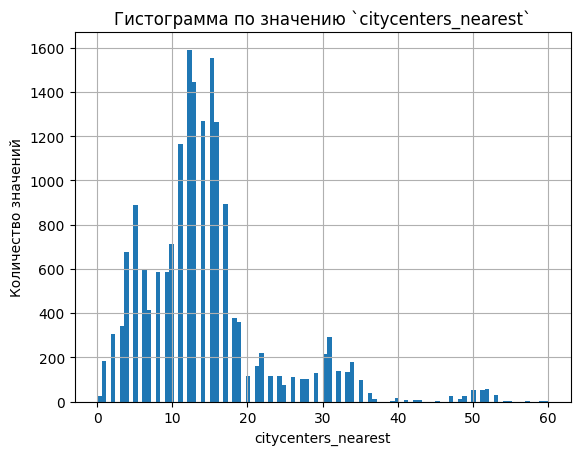

In [80]:
#построим гистограмму по значениям расстояния до центра в километрах
data['citycenters_nearest'].hist(bins = 100, range = (0,60))
plt.ylabel('Количество значений')
plt.title('Гистограмма по значению `citycenters_nearest`')
plt.xlabel('citycenters_nearest');

In [81]:
data['citycenters_nearest'].value_counts() #проверим значения столбца

citycenters_nearest
12.0    1592
15.0    1553
13.0    1446
14.0    1270
16.0    1263
        ... 
62.0       1
59.0       1
45.0       1
61.0       1
63.0       1
Name: count, Length: 61, dtype: int64

Учитывая что расстояние представлено в километрах, большие значения подразумевают, судя по всему, значения до Санкт-Петербурга, что к расстоянию до центра города отношения не имеет. Отсекать значения не будем, изучим потом показатели в разрезе Санкт-Петербурга.

### Расстояние до ближайшего парка

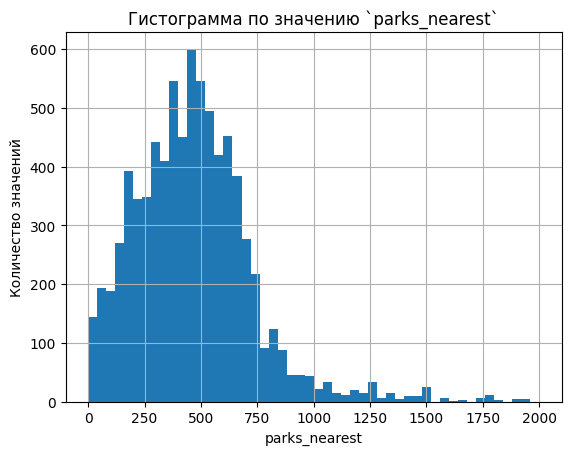

In [82]:
data['parks_nearest'].hist(bins = 50, range = (0,2000)) #построим гистограмму по значениям расстояния до парка в метрах
plt.ylabel('Количество значений')
plt.title('Гистограмма по значению `parks_nearest`')
plt.xlabel('parks_nearest');

Логика подсказывает, что мало кто будет рассматривать характеристику `удаленность от ближайшего парка` в качестве характеристики квартиры, если до него идти более 1 км. Отсекать значения не будем. Зависимость не понадобится.

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23362 entries, 0 to 23698
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23362 non-null  int64         
 1   last_price            23362 non-null  float64       
 2   total_area            23362 non-null  float64       
 3   first_day_exposition  23362 non-null  datetime64[ns]
 4   rooms                 23362 non-null  int64         
 5   ceiling_height        23362 non-null  float64       
 6   floors_total          23362 non-null  int32         
 7   living_area           23362 non-null  float64       
 8   floor                 23362 non-null  int64         
 9   is_apartment          23362 non-null  bool          
 10  studio                23362 non-null  bool          
 11  open_plan             23362 non-null  bool          
 12  kitchen_area          23362 non-null  float64       
 13  balcony              

### Срок экспозиции

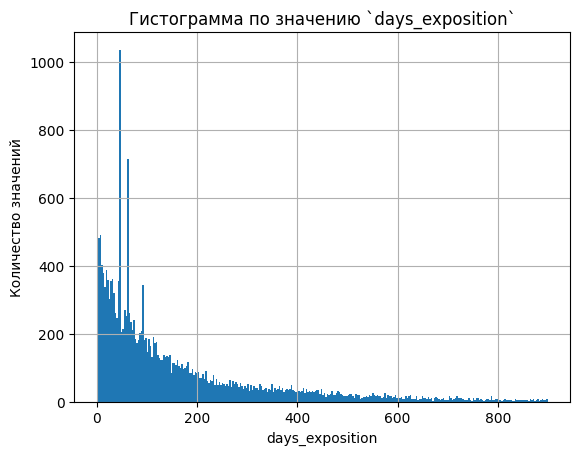

In [84]:
data['days_exposition'].hist(bins = 300, range = (0,900)) #построим гистограмму по значениям столбца `days_exposition`
plt.ylabel('Количество значений')
plt.title('Гистограмма по значению `days_exposition`')
plt.xlabel('days_exposition');

Есть три всплеска данных. Проверим, что это за данные.

In [85]:
data['days_exposition'].value_counts().head() #проверим данные по всплескам

days_exposition
45.0    871
60.0    538
7.0     233
30.0    206
90.0    195
Name: count, dtype: int64

In [86]:
data['days_exposition'].sort_values(ascending = False).head(10) #отсортируем значения столбца `days_exposition`

18843    1580.0
1109     1572.0
9553     1553.0
1885     1513.0
20969    1512.0
6691     1512.0
14093    1497.0
15313    1489.0
19123    1485.0
11955    1484.0
Name: days_exposition, dtype: float64

In [87]:
median_days_exp = data['days_exposition'].median() #рассчитаем медиану по столбцу `days_exposition`
print(median_days_exp)

95.0


In [88]:
mean_days_exp = round(data['days_exposition'].mean(),2) #рассчитаем среднее по столбцу `days_exposition`
print(mean_days_exp)

180.33


Медиана не учитывает выбросов, в отличии от среднего значения. Квартира может продаваться долго. Для этого есть несколько причин:

- слишком высокая стоимость (продавец не чувствует рынка и не осознает, что стоимость это не только желания продавца, но и желания покупателя)
- проблемы с самой квартирой (например, неузаконенная переланировка)

Но ввиду того, что в столбце `days_exposition` есть и пропуски, это может быть и технический баг, а также квартира может до сих пор продаваться. Срок экспозиции помещения свыше года можно уже считать долгим.

### Определение факторов, которые больше всего влияют на стоимость

Сложно говорить о зависимости в разных населенных пунктах ввиду различной инвестиционной привлекательности объектов. Проверим, где самое большое количество предложений.

In [89]:
display(data['locality_name'].value_counts())

locality_name
санкт-петербург    15495
мурино               586
кудрово              469
шушары               439
всеволожск           397
                   ...  
алексеевка             1
белоостров             1
пельгора               1
каложицы               1
дзержинского           1
Name: count, Length: 304, dtype: int64

Будем работать с данными Санкт - Петербурга, как с самыми показательными.

In [90]:
data_SP = data.query('locality_name=="санкт-петербург"')

Рассчитаем коэффициенты корреляции для значений и построим графики (чем ближе коэффициент к 1, тем более зависимы показатели):
    
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

In [91]:
#рассчитаем коэффициент корреляции `last_price` - `total_area`
print(data_SP['total_area'].corr(data_SP['last_price'])) 

0.6741967097633057


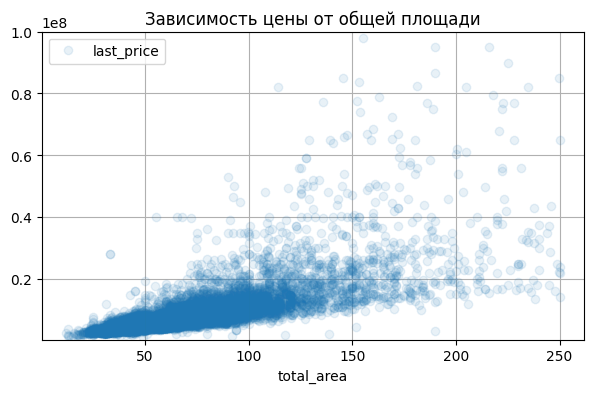

In [92]:
data_SP.plot(x='total_area', y='last_price', style='o', ylim = (400000,100000000),grid = True, figsize=(7, 4),alpha=0.1) 
plt.title('Зависимость цены от общей площади');

In [93]:
#рассчитаем коэффициент корреляции `last_price` - `living_area`
print(data_SP['living_area'].corr(data_SP['last_price'])) 

0.5849745156790402


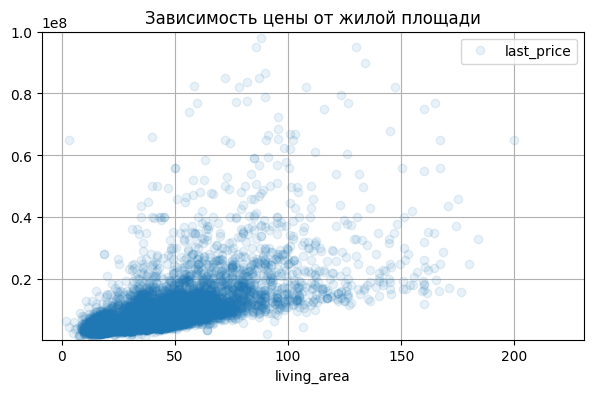

In [94]:
data_SP.plot(x='living_area', y='last_price', style='o', ylim = (400000,100000000),grid = True, figsize=(7, 4),alpha=0.1)
plt.title('Зависимость цены от жилой площади');

In [95]:
#рассчитаем коэффициент корреляции `last_price` - `kitchen_area`
print(data_SP['kitchen_area'].corr(data_SP['last_price'])) 

0.5458844656536114


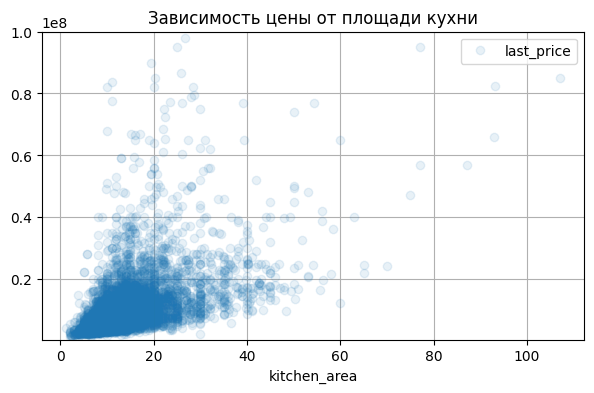

In [96]:
data_SP.plot(x='kitchen_area', y='last_price', style='o', ylim = (400000,100000000),grid = True, figsize=(7, 4),alpha=0.1)
plt.title('Зависимость цены от площади кухни');

In [97]:
#рассчитаем коэффициент корреляции `last_price` - `rooms`
print(data_SP['rooms'].corr(data_SP['last_price'])) 

0.4033559893586464


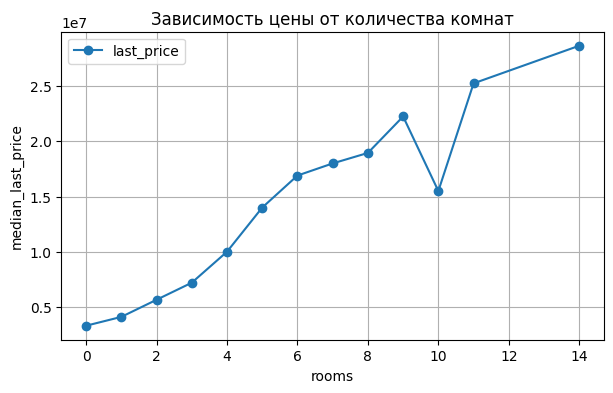

In [98]:
#присвоим медианные значения столбца `last_price` для каждого количества комнат и выведем график
(
    data_SP
    .pivot_table(index='rooms', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(7, 4))
)
plt.title('Зависимость цены от количества комнат')
plt.ylabel('median_last_price');

Корреляцию для этажей не выведешь, но график можно построить.

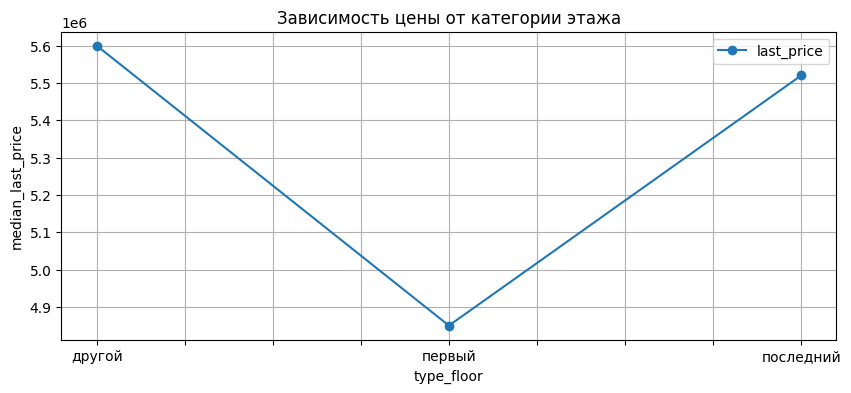

In [99]:
#присвоим медианные значения столбца `last_price` для каждого типа этажа и выведем график
(
    data_SP
    .pivot_table(index='type_floor', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(10, 4))
)
plt.title('Зависимость цены от категории этажа')
plt.ylabel('median_last_price');

Корреляцию для дней выводить бесполезно, т.к. значения дней содержат численные значения.

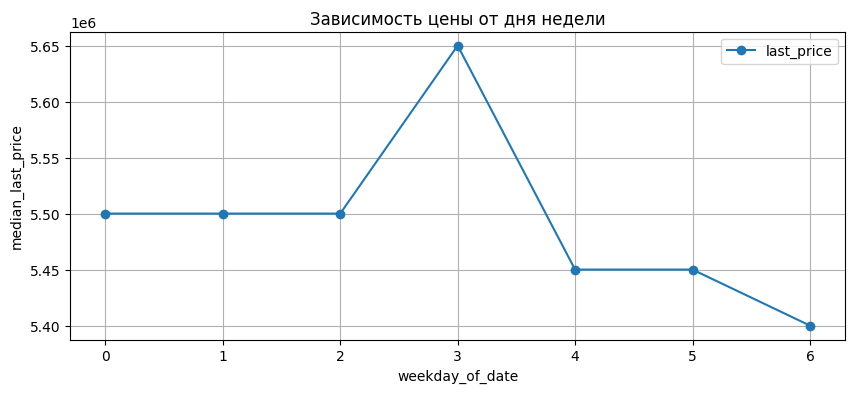

In [100]:
#присвоим медианные значения столбца `last_price` для каждого типа дня и выведем график
(
    data_SP
    .pivot_table(index='weekday_of_date', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(10, 4))
)
plt.title('Зависимость цены от дня недели')
plt.ylabel('median_last_price');

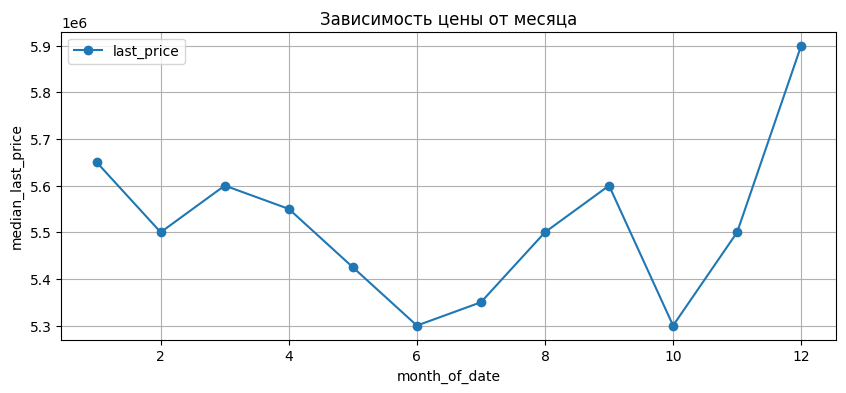

In [101]:
#присвоим медианные значения столбца `last_price` для каждого значения месяца и выведем график
(
    data_SP
    .pivot_table(index='month_of_date', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(10, 4))
)
plt.title('Зависимость цены от месяца')
plt.ylabel('median_last_price');

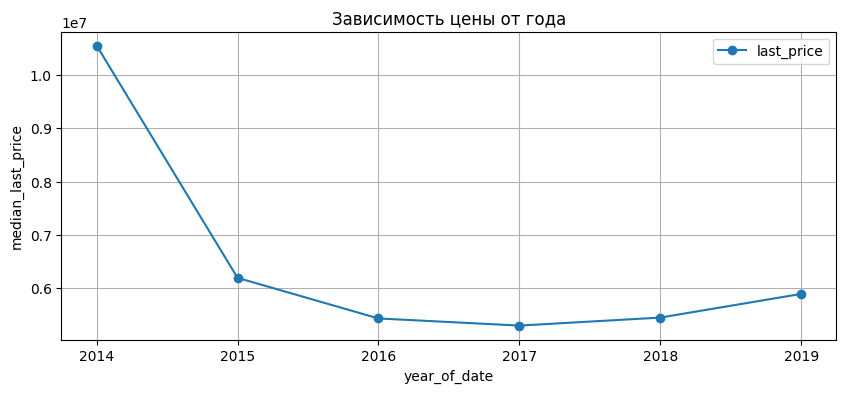

In [102]:
#присвоим медианные значения столбца `last_price` для каждого значения года и выведем график
(
    data_SP
    .pivot_table(index='year_of_date', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(10, 4))
)
plt.title('Зависимость цены от года')
plt.ylabel('median_last_price');

<div style="border:solid green 2px; padding: 20px">
Вывод: на четвертом этапе были изучения показатели:
        
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего парка

Больше всего на цену влияют общая площадь, жилая площадь, количество комнат, тип этажа. Обратная зависимость обнаружена при анализе показателя года. Учитывая, что зависимость устанавливалась между годом и полной стоимостью, а также учитывая предыдущие зависимости от площади, предполагается, что в 2014 году продавались самые большие квартиры.
Некоторы предложения находятся на рынке необычно долго. Это или технический баг, илии завышенные ожидания продавца, или проблемы с помещением. Также может быть что помещение до сих пор на реализации.

## Расчет средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [103]:
#отберем 10 населенных пунктов с наибольшим количеством объявлений

#создадим сводную таблицу и отсортируем по убыванию
data_value = data.pivot_table(index='locality_name', values = 'price_1_metr', aggfunc='count')\
.sort_values(by = 'price_1_metr',ascending = False)

#переименуем столбец
data_value.columns = ['count']

#Выведем первые 10 строк
data_value.head(10)

,count
locality_name,
санкт-петербург,15495
мурино,586
кудрово,469
шушары,439
всеволожск,397
пушкин,364
колпино,336
парголово,326
гатчина,307


In [104]:
#создадим создадим сводную таблицу по стоимости 1 кв. м
pivot_table = data.pivot_table(index='locality_name', values='price_1_metr', aggfunc='mean')

#округлим значения до 2 знаков после запятой
pivot_table['price_1_metr'] = round(pivot_table['price_1_metr'],2)

#добавим в таблицу pivot_table значения столбцов из таблицы data_value
pivot_table['count'] = data_value['count']

#выведем таблицу
pivot_table.sort_values(by = 'count',ascending = False).head(10)

,price_1_metr,count
locality_name,,
санкт-петербург,114033.42,15495
мурино,86041.12,586
кудрово,95261.96,469
шушары,78551.34,439
всеволожск,68719.32,397
пушкин,103153.02,364
колпино,75352.48,336
парголово,90205.42,326
гатчина,68746.15,307


<div style="border:solid green 2px; padding: 20px">
Вывод: на пятом этапе выяснено, что самая большая цена 1 кв.м в Санкт- Петербурге, а самая маленькая в Выборге в имеющейся выборке.


## Зависимость стоимости 1 кв.м в Санкт-Петербурге от удаленности от центра

In [105]:
# построим сводную таблицу по значениям удаленности от центра и средней стоимости 1 кв.м в Санкт-Петербурге
data_SP_citycenter = data_SP.pivot_table(index='citycenters_nearest', values = 'price_1_metr', aggfunc='mean')

#округлим значения в столбце `price_1_metr`
data_SP_citycenter['price_1_metr'] = round(data_SP_citycenter['price_1_metr'],2)


display(data_SP_citycenter)

,price_1_metr
citycenters_nearest,
0.0,231767.96
1.0,176594.14
2.0,154971.25
3.0,120602.04
4.0,129250.06
5.0,137448.47
6.0,147449.47
7.0,154731.87
8.0,124266.50


Построим график изменения средней цены для каждого километра от центра Санкт - Петербурга

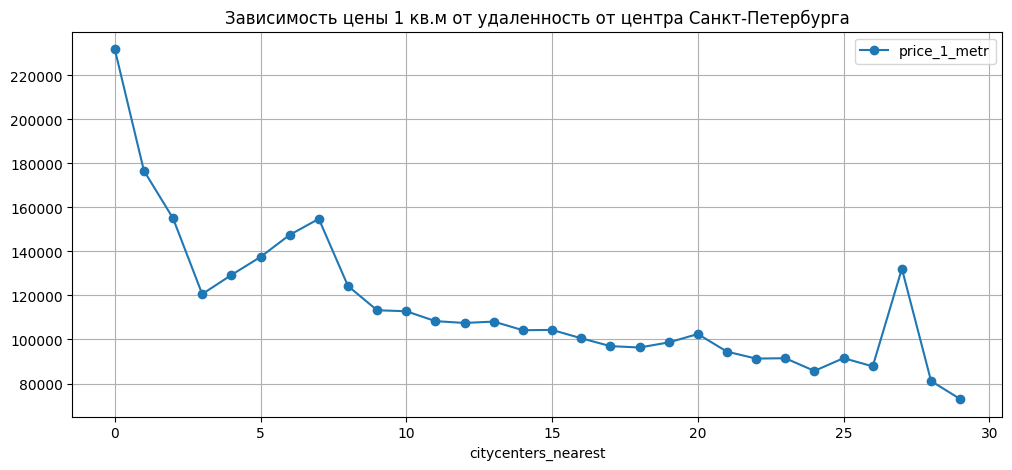

In [106]:
data_SP_citycenter.plot(grid=True, style='o-', figsize=(12, 5))
plt.title('Зависимость цены 1 кв.м от удаленность от центра Санкт-Петербурга');

<div style="border:solid green 2px; padding: 20px">
Вывод: на шестом этапе была выявлена обратная зависимость между расстоянием от центра города и ценой 1 кв.м, что вполне логично. Исторически на этапе развития города все основные удобства, коммуникации, торговые объекты, места работы жителей расположены именно в центре города.

## Общий вывод

<div style="border:solid green 2px; padding: 20px">
Вывод:

1.	На первом этапе мы открыли датасет с данными, изучили общую информацию о датасете и построили гистограммы для всех числовых столбцов.
    
2.	На втором этапе мы удалили пропуски в данных (где это возможно) в столбцах `ceiling_height`, `floors_total`, `living_area`, `living_area`, `kitchen_area`, `balcony`, `locality_name`, `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`, `days_exposition`. Отбросили выбивающиеся значения в столбце `ceiling_heght`. Выявили зависимость между общей и жилой площадью, благодаря которой смогли заполнить столбец `living_area` медианным соотношением `total_area` и `living_area`. Удалили пропуски в столбце `locality_name`, т.к. без знания точного адреса невозможно определить инвестиционную привлекательностью объекта. Заполнили столбец `is_apartment` значениями False, т.к. данные не указаны. Заполнили пропуски в столбце `balcony` нулевыми значениями, т.к. велика вероятность, что балкона нет. Заполнили пропуски столбце `kitchen_area` медианным значением соотношения значений `kitchen_area` и `total_area`. Удалили дубликаты в столбце `locality_name`.
    
3.	На третьем этапе добавили в датасет данные по стоимости 1 квадратного метра, значения дня недели, месяца, года. Ввели категории для типа этажа помещения. Перевели значения столбца `citycenters_nearest` в км для дальнейшего анализа.
    
4.	На четвертом этапе проанализировали выбивающиеся значения из показателей:
    - общая площадь (оставили без изменений);
    - жилая площадь (оставили без изменений);
    - площадь кухни (оставили без изменений);
    - цена объекта (скорректировали минимальное значение);
    - количество комнат (оставили без изменений);
    - высота потолков (ограничили высотой в 2,5-3 м);
    - тип этажа квартиры («первый», «последний», «другой»)(оставили без изменений);
    - общее количество этажей в доме (выбросили выбивающиеся значения свыше 35);
    - расстояние до центра города в метрах (оставили без изменений);
    - расстояние до ближайшего парка (оставили без изменений).
    
Проанализировали значения столбца `days_exposition`. Некоторые квартиры продаются слишком долго. Это либо технический баг, либо продавец не понимает рынка и завышает стоимость помещения, либо с помещение есть проблемы. Также это могут быть предложения, все еще размещенные на рынке. Среднее значение времени продажи 95 дней, медианное – 180 дней. Показатели свыше года можно считать очень долгими.
Больше всего на стоимость влияет показатель общей площади, жилой площади, площади кухни, этажа, года и количества комнат. Анализ показал, что помещения на первых этажах менее всего интересны (близость подвала, меньшая безопасность за счет низкорасположенных окон). Более интересны помещения на последнем этаже, но тут есть проблема ввиду близости крыши. И самыми интересными являются помещения между 1 и последним этажами.
Зависимость от дня недели, месяца не наблюдается, учитывая медианные значения стоимости.
    
5. Самая большая цена 1 кв.м в Санкт- Петербурге (114033.42	 руб.), а самая маленькая в Выборге (58238.14 руб.) в имеющейся выборке в топ-10 населенных пунктов с самым большим объемом предложений.
    
6. Выявлена обратная зависимость стоимости 1 кв.м от расстояния от центра города в разрезе Санкт-Петербурга.
